In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [44]:
# Set parameters for better visualization
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [45]:
df = pd.read_csv("MonthWiseMarketArrivals_clean.csv")
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [46]:
# change the date column to time interval column
df.date = pd.DatetimeIndex(df.date)

In [47]:
# change the index to date column
df.index = pd.PeriodIndex(df.date, freq="M")
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2005-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
2006-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2010-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
2011-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
2012-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [6]:
df = df.sort_values(by="date")
df.head()

C:\Users\u23e00\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


# Q1. Get the modal price of onion for each month for the Mumbai
market (Hint: set monthly date as index and drop
redundant columns)


In [49]:
df_mum = df.loc[df.city == "MUMBAI"].copy()
df_mum.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01
2005-01,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,2005-01-01
2006-01,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,2006-01-01
2007-01,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,2007-01-01
2008-01,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,2008-01-01


In [50]:
df_mum= df_mum.drop(["market","month","year","priceMin","priceMax","state","city"], axis=1)
df_mum.head()

,quantity,priceMod,date
date,,,
2004-01,267100,849,2004-01-01
2005-01,275845,387,2005-01-01
2006-01,228000,402,2006-01-01
2007-01,205200,997,2007-01-01
2008-01,267550,448,2008-01-01


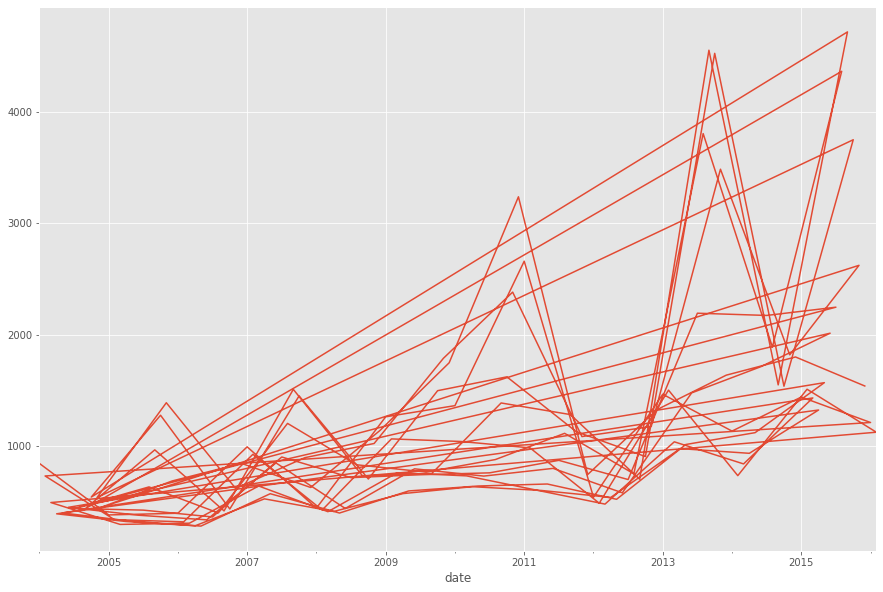

In [51]:
df_mum.priceMod.plot()
plt.show()

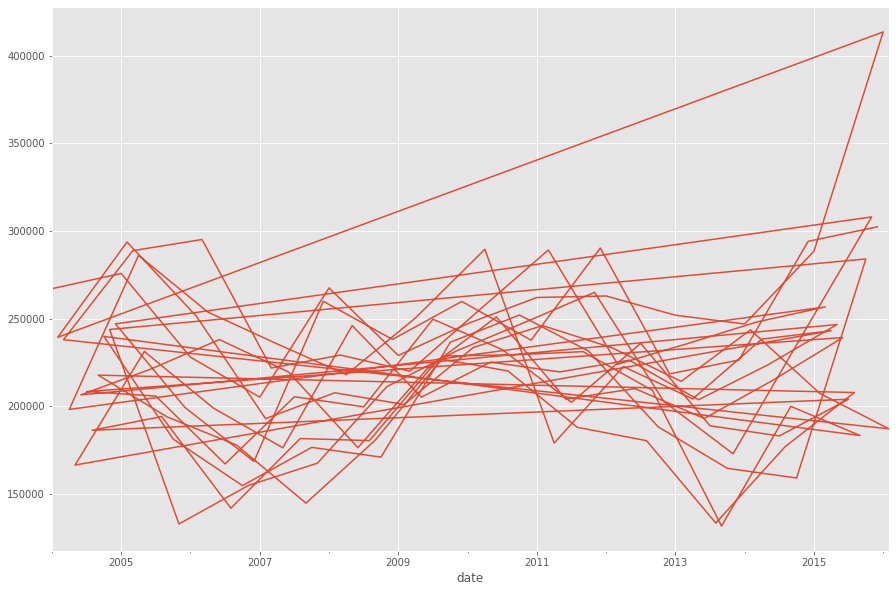

In [52]:
df_mum.quantity.plot()
plt.show()

### Log Transformation 

Log-transformations can help to stabilize the variance of a time series.
Let see using an example:

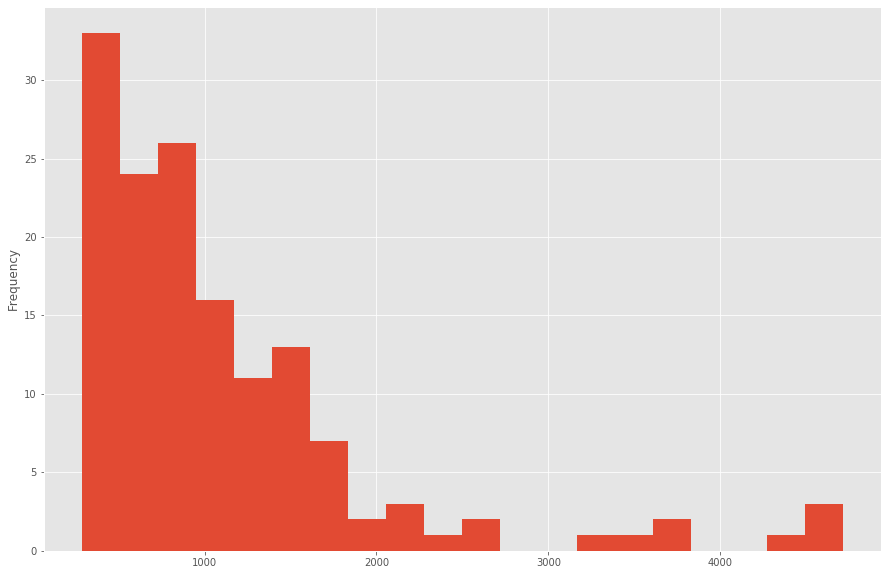

In [53]:
df_mum.priceMod.plot(kind="hist", bins=20)

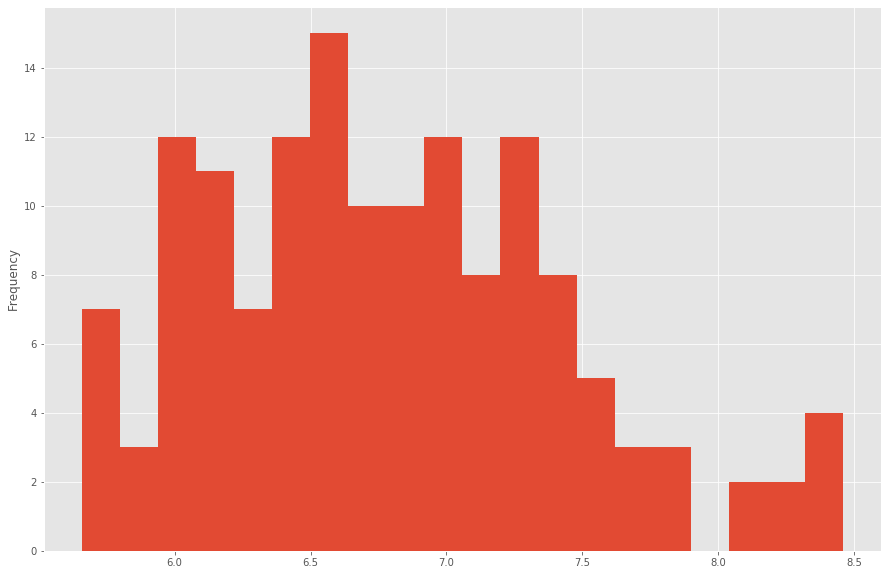

In [54]:
df_mum["log_priceMod"] = np.log(df_mum.priceMod)
df_mum.log_priceMod.plot(kind="hist", bins=20)

#### The above histogram is more look like normal distribution

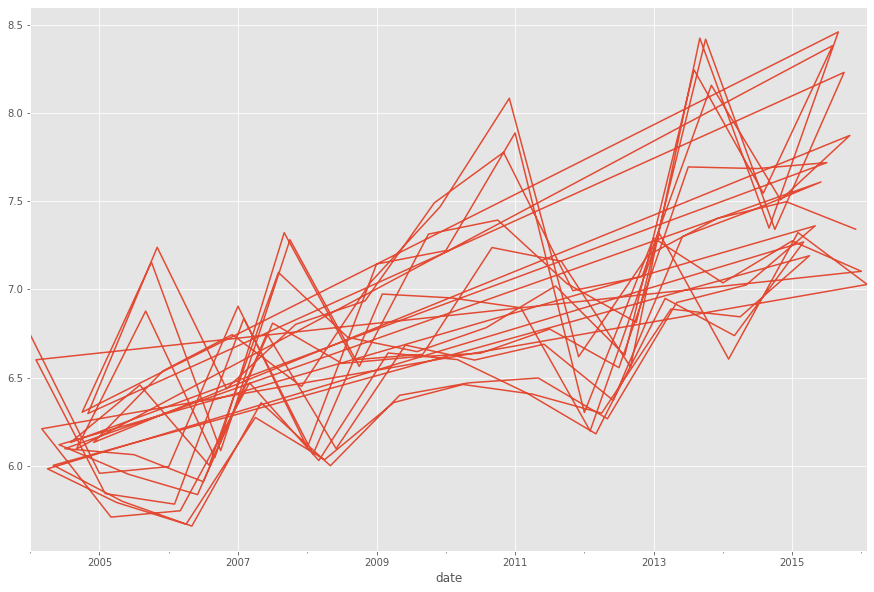

In [55]:
df_mum.log_priceMod.plot()

##  Mean Constant Model

In [63]:
df_mum_mean = df_mum.log_priceMod.mean()
df_mum["mean_price"] = np.exp(df_mum_mean)
df_mum.head()

,quantity,priceMod,date,log_priceMod,mean_price
date,,,,,
2004-01,267100,849,2004-01-01,6.744059,889.100239
2005-01,275845,387,2005-01-01,5.958425,889.100239
2006-01,228000,402,2006-01-01,5.996452,889.100239
2007-01,205200,997,2007-01-01,6.904751,889.100239
2008-01,267550,448,2008-01-01,6.104793,889.100239


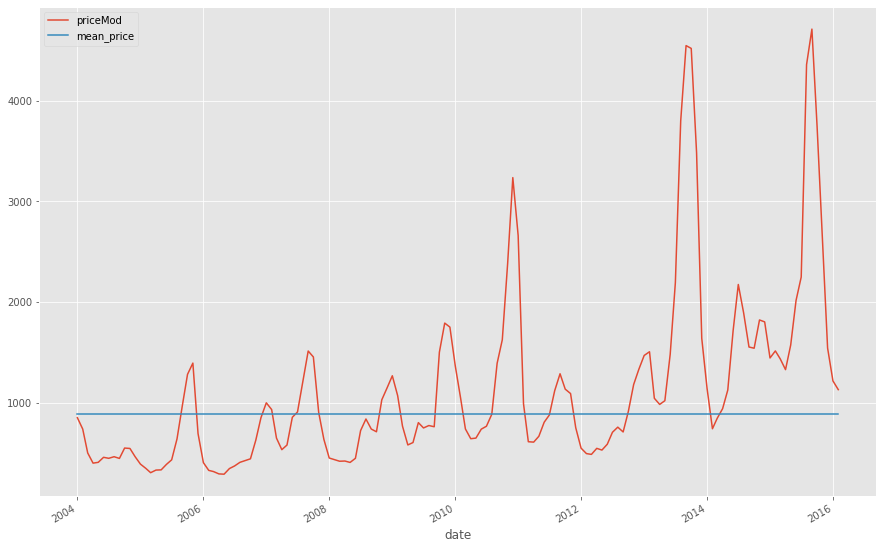

In [64]:
df_.plot(kind="line", x="date", y=["priceMod", "mean_price"])

# Q2. Evaluate this model using RSME

In [66]:
def RMSE(actual, predicted):
    mse = (actual - predicted)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [67]:
mean_modelRMSE = RMSE(df_mum.priceMod, df_mum.mean_price)
mean_modelRMSE

908.4772843986449

Lets save the model's RMSE in dataframe:

In [68]:
Result_df = pd.DataFrame(columns =["Model","Forcast","RMSE"])
Result_df.loc[0,"Model"] = "Mean Model"
Result_df.loc[0,"Forcast"] = np.exp(df_bang_mean)
Result_df.loc[0,"RMSE"] = mean_modelRMSE
Result_df

,Model,Forcast,RMSE
0,Mean Model,884.566,908.477


## Linear Trend Model

In [69]:
df_mum.head()

,quantity,priceMod,date,log_priceMod,mean_price
date,,,,,
2004-01,267100,849,2004-01-01,6.744059,889.100239
2005-01,275845,387,2005-01-01,5.958425,889.100239
2006-01,228000,402,2006-01-01,5.996452,889.100239
2007-01,205200,997,2007-01-01,6.904751,889.100239
2008-01,267550,448,2008-01-01,6.104793,889.100239


In [20]:
df_bang.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 146 entries, 2004-01 to 2016-02
Freq: M
Data columns (total 5 columns):
quantity        146 non-null int64
priceMod        146 non-null int64
date            146 non-null datetime64[ns]
log_priceMod    146 non-null float64
mean_price      146 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 6.8 KB


In [70]:
# Converting the date into datetinme delta starting from 0
df_mum["timeindex"] = df_mum.date - df_mum.date.min()
df_mum.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex
date,,,,,,
2004-01,267100,849,2004-01-01,6.744059,889.100239,0 days
2005-01,275845,387,2005-01-01,5.958425,889.100239,366 days
2006-01,228000,402,2006-01-01,5.996452,889.100239,731 days
2007-01,205200,997,2007-01-01,6.904751,889.100239,1096 days
2008-01,267550,448,2008-01-01,6.104793,889.100239,1461 days


In [71]:
df_mum.dtypes

quantity                  int64
priceMod                  int64
date             datetime64[ns]
log_priceMod            float64
mean_price              float64
timeindex       timedelta64[ns]
dtype: object

In [72]:
# converting the timeindex into months using timedelta
df_mum["timeindex"] = df_mum["timeindex"]/np.timedelta64(1,"M")
df_mum.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex
date,,,,,,
2004-01,267100,849,2004-01-01,6.744059,889.100239,0.000000
2005-01,275845,387,2005-01-01,5.958425,889.100239,12.024888
2006-01,228000,402,2006-01-01,5.996452,889.100239,24.016920
2007-01,205200,997,2007-01-01,6.904751,889.100239,36.008953
2008-01,267550,448,2008-01-01,6.104793,889.100239,48.000986


In [75]:
df_mum["timeindex"] = df_mum["timeindex"].round(0).astype(int)
df_mum.tail()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex
date,,,,,,
2011-12,290350,749,2011-12-01,6.618739,889.100239,95
2012-12,218500,1330,2012-12-01,7.192934,889.100239,107
2013-12,226385,1639,2013-12-01,7.401842,889.100239,119
2014-12,294150,1802,2014-12-01,7.496652,889.100239,131
2015-12,302409,1542,2015-12-01,7.340836,889.100239,143


### Apply the linear model 

In [77]:
linear_model = smf.ols('log_priceMod ~ timeindex', data = df_mum).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_priceMod   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     129.3
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           8.89e-22
Time:                        16:19:44   Log-Likelihood:                -96.121
No. Observations:                 146   AIC:                             196.2
Df Residuals:                     144   BIC:                             202.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0284      0.078     77.785      0.000       5.875       6.182
timeindex      0.0105      0.001     11.370      0.000       0.009       0.012
==============================================================================
Omnibus:                        7.658   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.054
Skew:                           0.566   Prob(JB):                       0.0178
Kurtosis:                       2.791   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
linear_model_pred = linear_model.predict()
linear_model_pred

array([6.02841087, 6.15450176, 6.28059265, 6.40668353, 6.53277442,
       6.65886531, 6.7849562 , 6.91104708, 7.03713797, 7.16322886,
       7.28931975, 7.41541064, 7.54150152, 6.03891844, 6.16500933,
       6.29110022, 6.41719111, 6.543282  , 6.66937288, 6.79546377,
       6.92155466, 7.04764555, 7.17373643, 7.29982732, 7.42591821,
       7.5520091 , 6.04942602, 6.17551691, 6.30160779, 6.42769868,
       6.55378957, 6.67988046, 6.80597134, 6.93206223, 7.05815312,
       7.18424401, 7.3103349 , 7.43642578, 6.05993359, 6.18602448,
       6.31211537, 6.43820626, 6.56429714, 6.69038803, 6.81647892,
       6.94256981, 7.06866069, 7.19475158, 7.32084247, 7.44693336,
       6.07044117, 6.19653205, 6.32262294, 6.44871383, 6.57480472,
       6.70089561, 6.82698649, 6.95307738, 7.07916827, 7.20525916,
       7.33135004, 7.45744093, 6.08094874, 6.20703963, 6.33313052,
       6.4592214 , 6.58531229, 6.71140318, 6.83749407, 6.96358495,
       7.08967584, 7.21576673, 7.34185762, 7.46794851, 6.09145

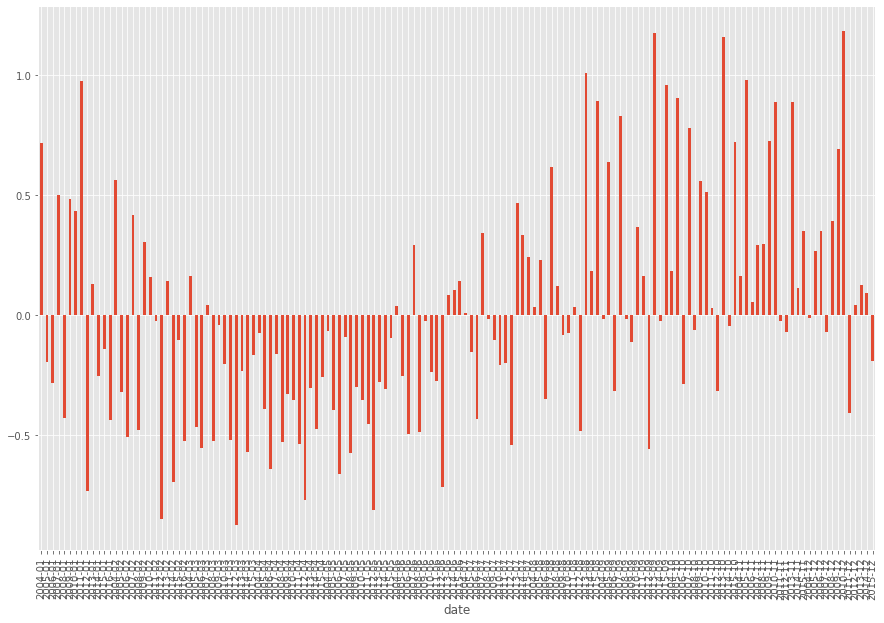

In [79]:
linear_model.resid.plot(kind="bar")

In [80]:
df_mum["linear_price"] = np.exp(linear_model_pred)
df_mum.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price
date,,,,,,,
2004-01,267100,849,2004-01-01,6.744059,889.100239,0,415.054929
2005-01,275845,387,2005-01-01,5.958425,889.100239,12,470.832196
2006-01,228000,402,2006-01-01,5.996452,889.100239,24,534.105105
2007-01,205200,997,2007-01-01,6.904751,889.100239,36,605.880962
2008-01,267550,448,2008-01-01,6.104793,889.100239,48,687.302435


In [83]:
linear_model_RMSE = RMSE(df_mum.priceMod, df_mum.linear_price)
linear_model_RMSE

724.7073314178772

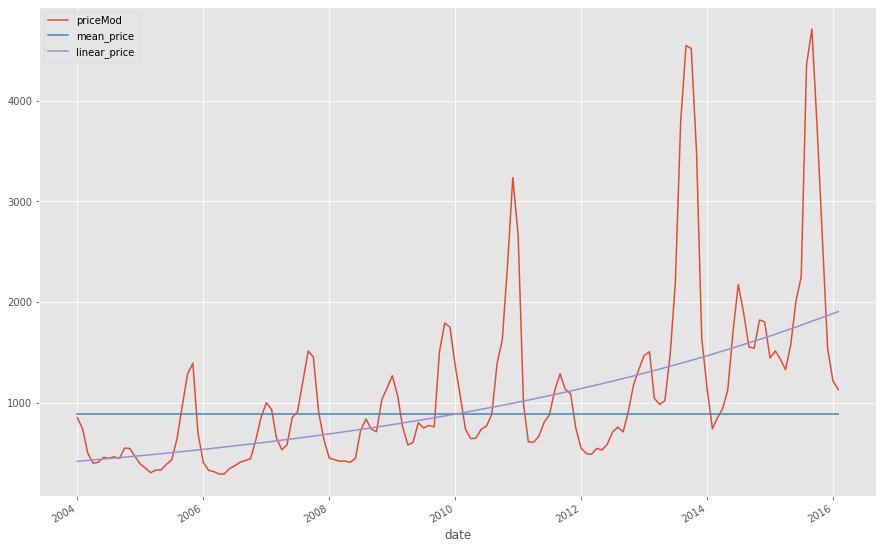

In [85]:
df_mum.plot(kind="line", x="date", y=["priceMod", "mean_price","linear_price"])

In [86]:
linear_model_quant = smf.ols('log_priceMod ~ timeindex + np.log(quantity)', data = df_mum).fit()
linear_model_quant.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_priceMod   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     77.15
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           1.88e-23
Time:                        16:21:13   Log-Likelihood:                -89.461
No. Observations:                 146   AIC:                             184.9
Df Residuals:                     143   BIC:                             193.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           15.2955      2.508      6.097      0.000      10.337      20.254
timeindex            0.0109      0.001     12.216      0.000       0.009       0.013
np.log(quantity)    -0.7562      0.205     -3.696      0.000      -1.161      -0.352
==============================================================================
Omnibus:                        4.787   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                4.880
Skew:                           0.429   Prob(JB):                       0.0872
Kurtosis:                       2.742   Cond. No.                     5.70e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

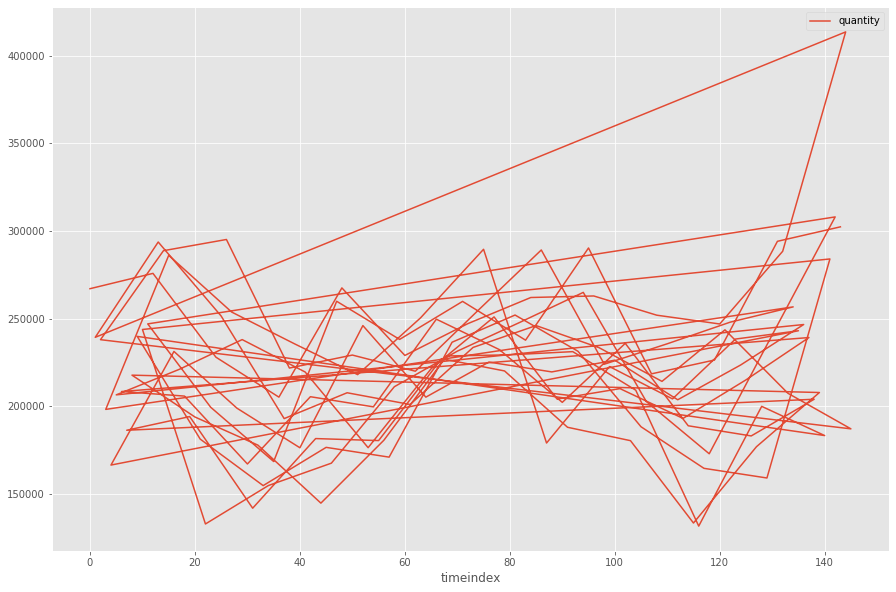

In [87]:
df_mum["linear_price_quant"] = np.exp(linear_model_quant.predict())
df_mum.plot(kind = "line", x="timeindex", y = "quantity")
plt.show()

In [88]:

df_mum["shift_log_priceMod"] = df_mum.log_priceMod.shift()
df_mum.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price,linear_price_quant,shift_log_priceMod
date,,,,,,,,,
2004-01,267100,849,2004-01-01,6.744059,889.100239,0,415.054929,345.986646,NaN
2005-01,275845,387,2005-01-01,5.958425,889.100239,12,470.832196,384.851208,6.744059
2006-01,228000,402,2006-01-01,5.996452,889.100239,24,534.105105,506.603000,5.958425
2007-01,205200,997,2007-01-01,6.904751,889.100239,36,605.880962,625.293077,5.996452
2008-01,267550,448,2008-01-01,6.104793,889.100239,48,687.302435,583.124884,6.904751


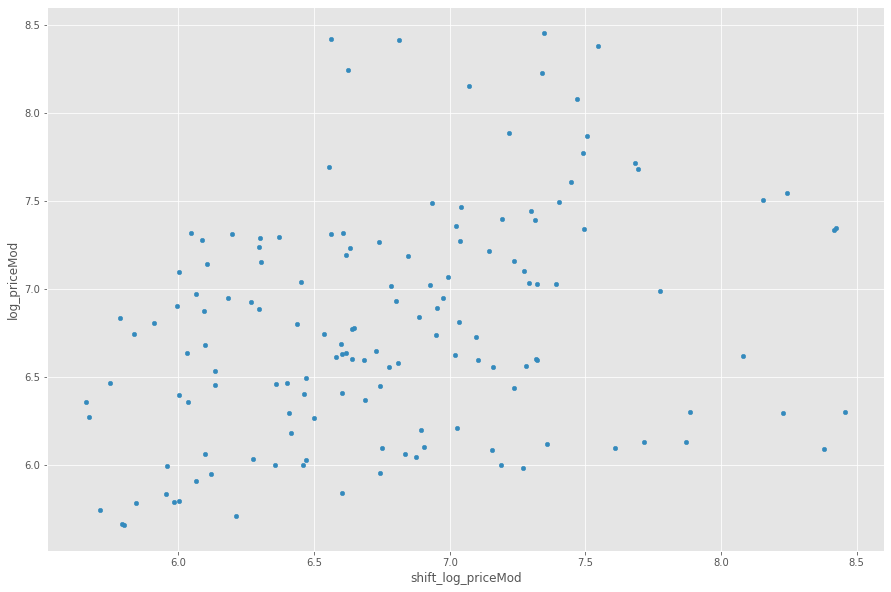

In [89]:
df_mum.plot(kind="scatter", x="shift_log_priceMod", y ="log_priceMod", s=20 )

In [90]:
df_mum["random_price"] = np.exp(df_mum.shift_log_priceMod)
df_mum.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price,linear_price_quant,shift_log_priceMod,random_price
date,,,,,,,,,,
2004-01,267100,849,2004-01-01,6.744059,889.100239,0,415.054929,345.986646,NaN,NaN
2005-01,275845,387,2005-01-01,5.958425,889.100239,12,470.832196,384.851208,6.744059,849.0
2006-01,228000,402,2006-01-01,5.996452,889.100239,24,534.105105,506.603000,5.958425,387.0
2007-01,205200,997,2007-01-01,6.904751,889.100239,36,605.880962,625.293077,5.996452,402.0
2008-01,267550,448,2008-01-01,6.104793,889.100239,48,687.302435,583.124884,6.904751,997.0


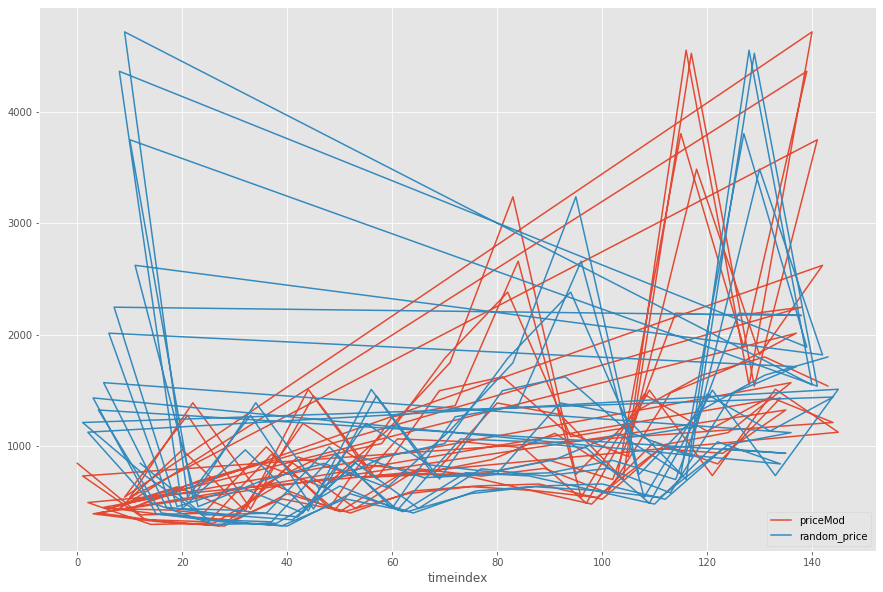

In [91]:
# lets compare random price and actual price
df_mum.plot(kind="line", x="timeindex", y = ["priceMod", "random_price"])

In [92]:
# evaluate the random walk model
random_model_RMSE = RMSE(df_mum.priceMod, df_mum.random_price)
random_model_RMSE

1132.4887241579172

In [94]:
def adf(ts):
    # Determing rolling statistics
    rolmean = ts.rolling(window=12).mean()
    rolstd = ts.rolling(window=12).std()

    #Plot rolling statistics:
    ts.plot(color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    # Calculate ADF factors
    adftest = adfuller(ts, autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','# of Lags Used',
                                              'Number of Observations Used'])
    for key,value in adftest[4].items():
        adfoutput['Critical Value (%s)'%key] = value
    return adfoutput

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_mum.index = pd.to_datetime(df_mum.date)
df_mum.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price,linear_price_quant,shift_log_priceMod,random_price
date,,,,,,,,,,
2004-01-01,267100,849,2004-01-01,6.744059,889.100239,0,415.054929,345.986646,NaN,NaN
2005-01-01,275845,387,2005-01-01,5.958425,889.100239,12,470.832196,384.851208,6.744059,849.0
2006-01-01,228000,402,2006-01-01,5.996452,889.100239,24,534.105105,506.603000,5.958425,387.0
2007-01-01,205200,997,2007-01-01,6.904751,889.100239,36,605.880962,625.293077,5.996452,402.0
2008-01-01,267550,448,2008-01-01,6.104793,889.100239,48,687.302435,583.124884,6.904751,997.0


In [99]:
decomposition = seasonal_decompose(df_mum.log_priceMod, model = "additive")
decomposition.plot()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [57]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

### Evaluate the Decomposition model

In [58]:
df_bang["decomp_price"] = np.exp(trend + seasonal)
decomp_model_RMSE = RMSE(df_bang.priceMod, df_bang.decomp_price)
decomp_model_RMSE

374.10858464802345

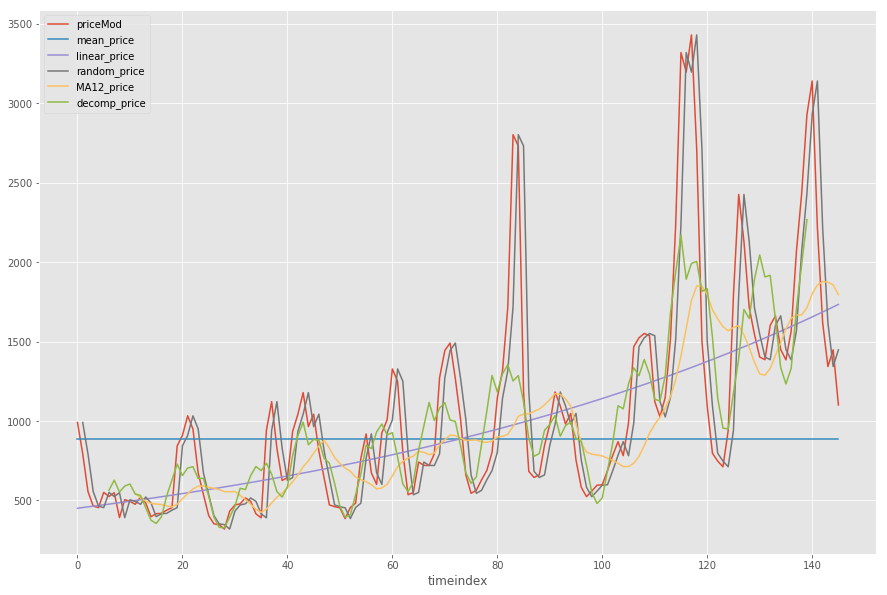

In [59]:
df_bang.plot(kind="line", x="timeindex", y = ["priceMod", "mean_price", "linear_price", "random_price",
                                             "MA12_price", "decomp_price"])

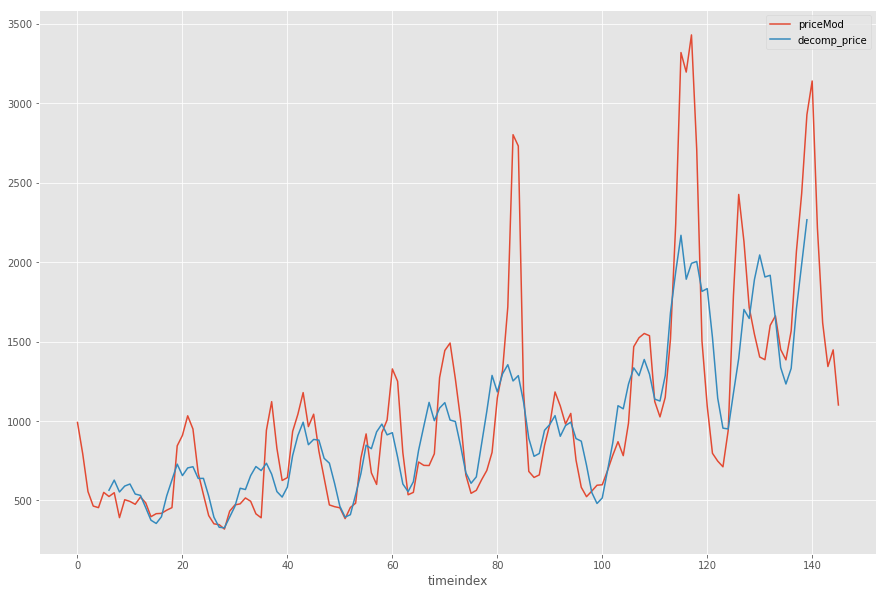

In [60]:
df_bang.plot(kind="line", x="timeindex", y = ["priceMod",
                                              "decomp_price"])

# Q3. Plot ACF and PACF plots

In [101]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_acf

C:\Users\sowndariya\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


array([ 1.        , -0.53607174,  0.39290486, -0.50487995,  0.30684403,
       -0.29682133,  0.22901089, -0.16589419,  0.15525963, -0.32322715,
        0.18183279, -0.22763854,  0.56605212, -0.19077813,  0.14178161,
       -0.28233371,  0.13220659, -0.16184876,  0.11504594, -0.07365738,
        0.15158822])

### ACF Plot

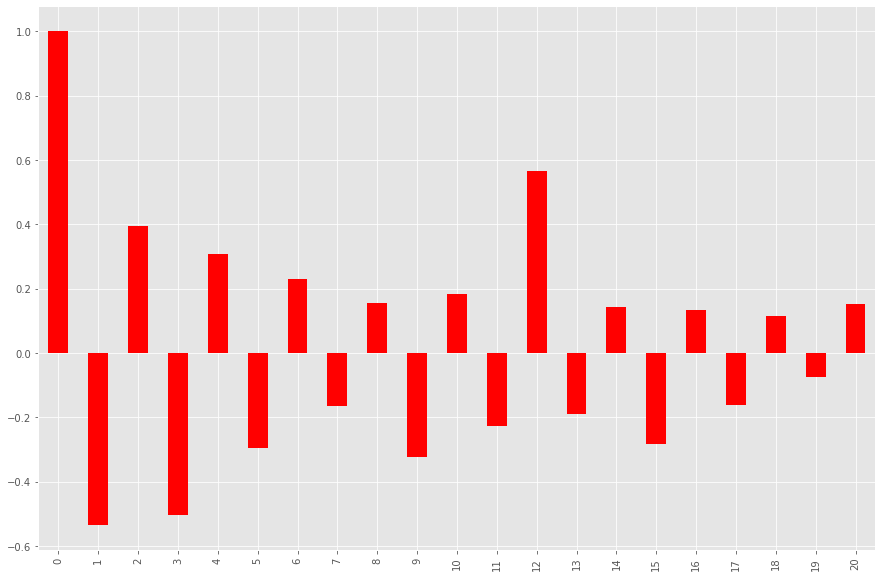

In [102]:
ACF = pd.Series(lag_acf)
ACF.plot(kind="bar", color="red")

### PACF plot

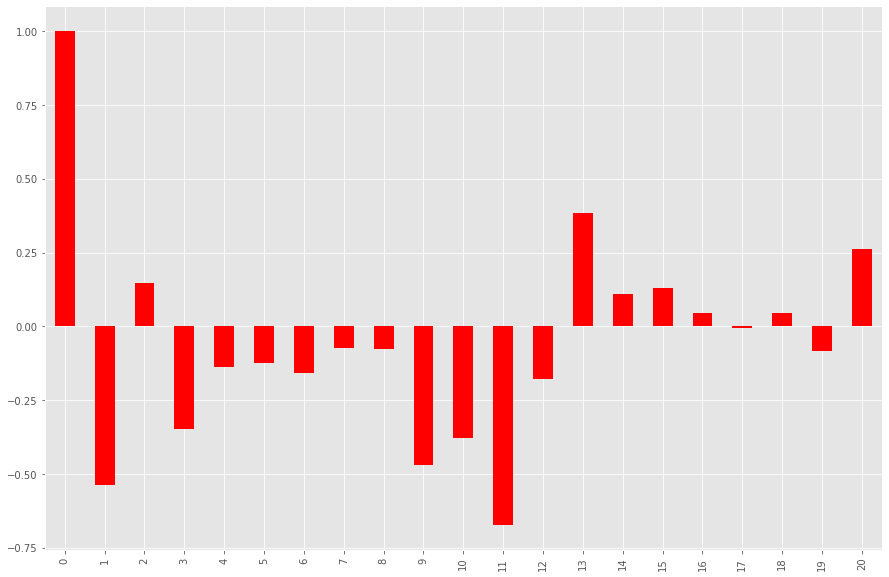

In [103]:
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
PACF = pd.Series(lag_pacf)
PACF.plot(kind="bar", color="red")

# Implement ARIMA model

In [104]:
from statsmodels.tsa.arima_model import ARIMA

In [105]:
ts_diff.head()

date
2005-01   -0.641047
2006-01    0.028331
2007-01    0.562007
2008-01   -0.691026
2009-01    1.034450
Freq: M, Name: log_priceMod_diff, dtype: float64

In [106]:
ARIMA_model = ARIMA(ts_diff, order=(1,0,1))
ARIMA_result = ARIMA_model.fit(disp = -1)
ARIMA_result.fittedvalues.head()

C:\Users\sowndariya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


date
2005-01    0.003550
2006-01    0.239631
2007-01    0.164837
2008-01   -0.160268
2009-01    0.255883
Freq: M, dtype: float64

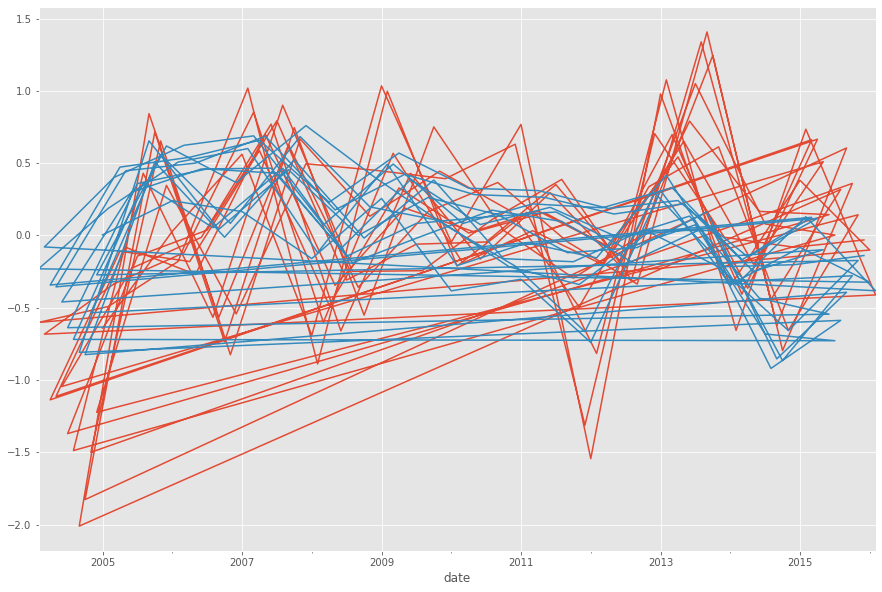

In [107]:
ts_diff.plot()
ARIMA_result.fittedvalues.plot()

In [108]:
ts_diff.sum()

0.3039466621932494

In [109]:
predictions_ARIMA_diff = pd.Series(ARIMA_result.fittedvalues, copy=True)
predictions_ARIMA_diff.tail()

date
2011-12   -0.665804
2012-12    0.293804
2013-12   -0.216200
2014-12   -0.202521
2015-12   -0.139242
Freq: M, dtype: float64

In [110]:
predictions_ARIMA_diff.sum()

5.440594989335854

In [111]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.tail()

date
2011-12    5.704754
2012-12    5.998558
2013-12    5.782358
2014-12    5.579837
2015-12    5.440595
Freq: M, dtype: float64

In [78]:
predictions_ARIMA_log = pd.Series(ts.ix[0], index=ts.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.tail()

C:\Users\u23e00\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


date
2015-10-01    7.243084
2015-11-01    7.072114
2015-12-01    6.975609
2016-01-01    6.916455
2016-02-01    6.970763
dtype: float64

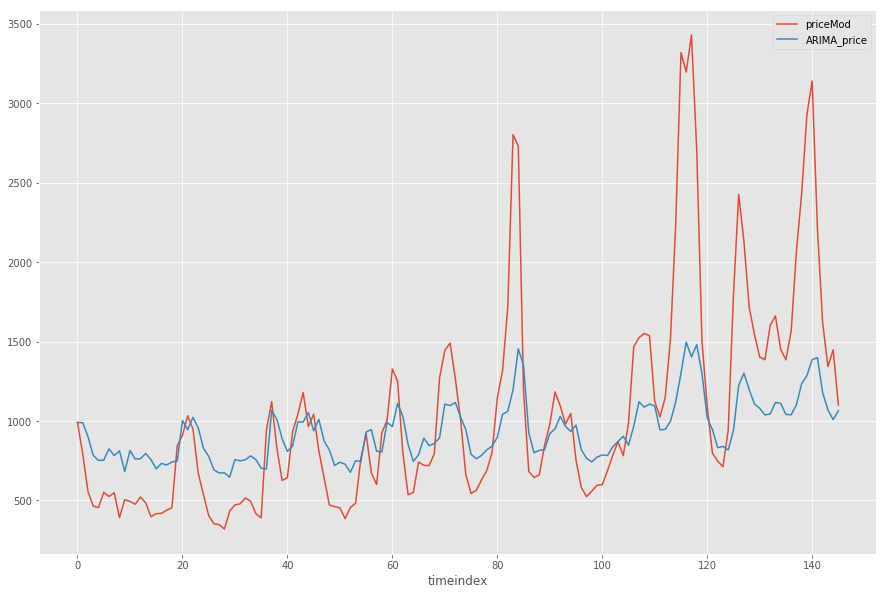

In [80]:
df_bang["ARIMA_price"] = np.exp(predictions_ARIMA_log)
df_bang.plot(kind="line", x="timeindex", y=["priceMod", "ARIMA_price"])